In [209]:
## HW1

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

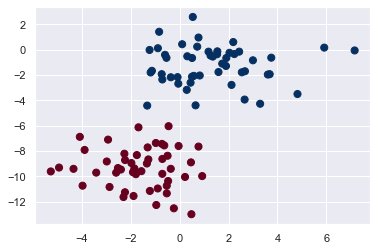

In [210]:
# Gaussian Naive Bayes

from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

[(-15, 5), (-8, 8)]

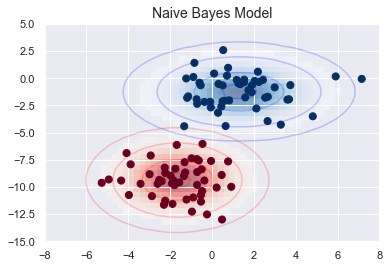

In [211]:
fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)

In [212]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [213]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

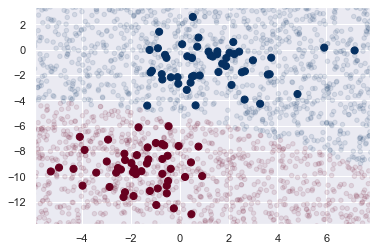

In [214]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [215]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

In [216]:
# Multinomial Naive Bayes

from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [217]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [218]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [219]:
print(test.data[5])

From: jsledd@ssdc.sas.upenn.edu (James Sledd)
Subject: Re: Dreams and out of body incidents
Organization: Social Science Computing
Lines: 6

In article <May.14.02.10.02.1993.25119@athos.rutgers.edu> alisonjw@spider.co.uk (Alison J Wyld) writes:
>From: alisonjw@spider.co.uk (Alison J Wyld)
>PS. Just to make it clear, I don't do ( and have never tried ) OOBEs.
>    I tend to think they are off limits for Christians.

WHY?



In [220]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [221]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

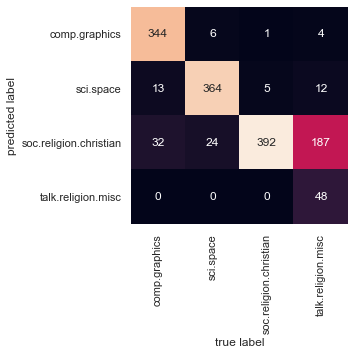

In [222]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [223]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [224]:
predict_category('sending a payload to the ISS')

'sci.space'

In [225]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [226]:
predict_category('determining the screen resolution')

'comp.graphics'

In [227]:
# HW 2

import numpy as np 
np.set_printoptions(precision=3)
import pandas as pd 
pd.set_option('display.precision',3)
import matplotlib.pyplot as plt
import seaborn as sns

In [228]:
# Importing the dataset
wine = pd.read_csv('C:/Users/gerrard/Desktop/새 폴더/2020-1/ESC/3주차/wine.csv', header=-1)  ## 한 행씩 내리기
col_names = ['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
             'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
             'OD280/OD315 of diluted wines', 'Proline']
new_col = {}
for i in np.arange(14):
    new_col[i] = col_names[i]
wine.rename(columns=new_col, inplace=True) # Column name 설정

In [229]:
wine

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C9A66CE3C8>,
      dtype=object)

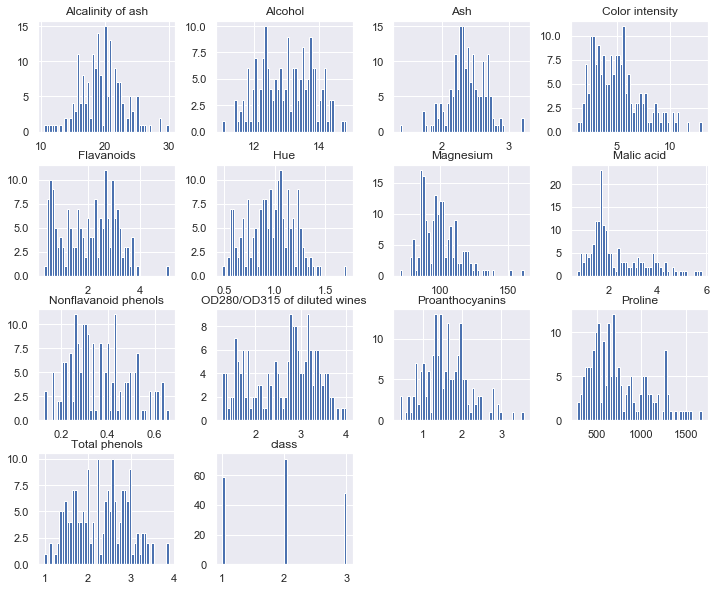

In [230]:
# 변수들의 분포 확인

wine.hist(bins=50, figsize=(12, 10))

In [231]:
# NA값 있는지 확인

wine.info() # No NA value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
class                           178 non-null int64
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


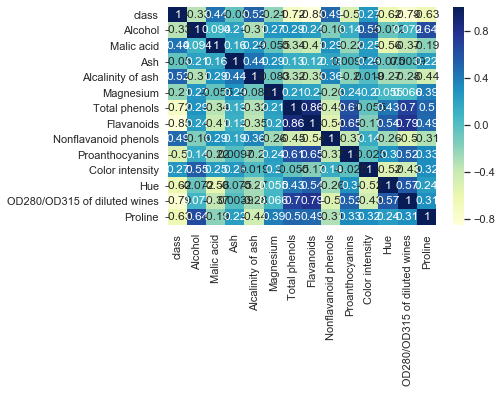

In [232]:
## 제일 의미있어 보이는 설명변수 2개 선택하기

corr = wine[wine.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot = True)

## class와의 절댓값이 제일 큰 Flavanoids와 양수중에 제일 큰 Alcalinity of ash로 선택

In [233]:
## Alcalinity of ash의 기술통계량 확인

wine['Alcalinity of ash'].describe()

count    178.000
mean      19.495
std        3.340
min       10.600
25%       17.200
50%       19.500
75%       21.500
max       30.000
Name: Alcalinity of ash, dtype: float64

In [234]:
## Flavanoids의 기술통계량 확인

wine['Flavanoids'].describe()

count    178.000
mean       2.029
std        0.999
min        0.340
25%        1.205
50%        2.135
75%        2.875
max        5.080
Name: Flavanoids, dtype: float64

In [235]:
ht = np.linspace(8, 35, 500) ## 기술통계량 보고 X축 설정하기

In [236]:
## Train-Test Split

N = wine.shape[0]
test = np.random.choice(np.arange(N), int(N*0.2), replace=False)
test_df = wine[wine.index.isin(test)].copy()
train_df = wine[~wine.index.isin(test)].copy()
print(train_df.shape, test_df.shape)

(143, 14) (35, 14)


In [237]:
X_train = train_df[['Alcalinity of ash', 'Flavanoids']]
Y_train = train_df['class']
X_test = test_df[['Alcalinity of ash', 'Flavanoids']]
Y_test = test_df['class']

X_train_input = np.vstack((X_train['Alcalinity of ash'], X_train['Flavanoids'])).T  ## Transpose
Y_train_input = np.hstack((np.repeat(1, sum(Y_train==1)), np.repeat(2, sum(Y_train==2)), np.repeat(3, sum(Y_train==3))))
X_test_input = np.vstack((X_test['Alcalinity of ash'], X_test['Flavanoids'])).T  ## Transpose
Y_test_input = np.hstack((np.repeat(1, sum(Y_test==1)), np.repeat(2, sum(Y_test==2)), np.repeat(3, sum(Y_test==3))))

In [238]:
## Fitting on LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_LDA = LinearDiscriminantAnalysis().fit(X_train_input,Y_train_input)
w = clf_LDA.coef_; w0 = clf_LDA.intercept_
db1 = -w0[0]/w[0, 1] - w[0, 0]/w[0, 1] * ht    ## Decision boundary 1
db2 = -w0[1]/w[1, 1] - w[1, 0]/w[1, 1] * ht    ## Decision boundary 2
db3 = -w0[2]/w[2, 1] - w[2, 0]/w[2, 1] * ht    ## Decision boundary 3

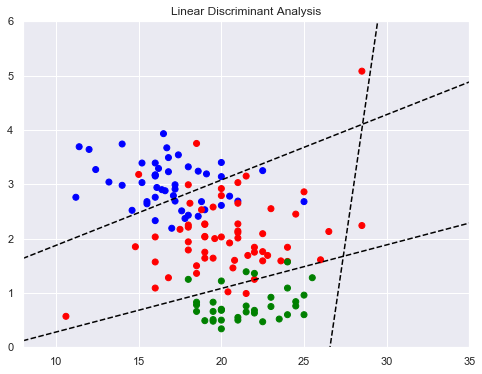

In [239]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set(xlim=(8, 35), ylim=(0, 6), title='Linear Discriminant Analysis')
colors=np.array(['blue','red', 'green'])
ax.scatter(X_train_input[:,0], X_train_input[:,1], color=colors[Y_train_input-1])
ax.plot(ht, db1.T, label='LDA DB', color='black', linestyle='--')      ## Decision boundary 1
ax.plot(ht, db2.T, label='LDA DB', color='black', linestyle='--')      ## Decision boundary 2
ax.plot(ht, db3.T, label='LDA DB', color='black', linestyle='--')      ## Decision boundary 3

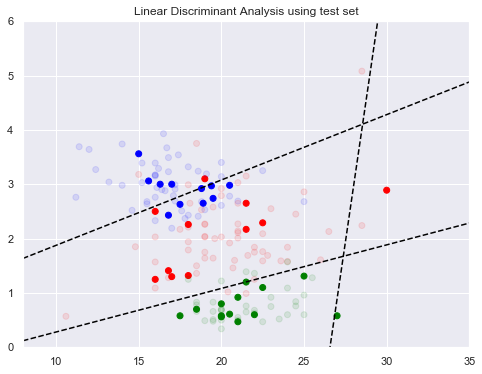

In [240]:
## Test set으로 scatter plot 그려보기

fig, ax = plt.subplots(figsize=(8,6))
ax.set(xlim=(8, 35), ylim=(0, 6), title='Linear Discriminant Analysis using test set')
colors=np.array(['blue','red', 'green'])
ax.scatter(X_test_input[:,0], X_test_input[:,1], color=colors[Y_test_input-1])
ax.scatter(X_train_input[:,0], X_train_input[:,1], color=colors[Y_train_input-1], alpha = 0.1)
ax.plot(ht, db1.T, label='LDA DB', color='black', linestyle='--')
ax.plot(ht, db2.T, label='LDA DB', color='black', linestyle='--')
ax.plot(ht, db3.T, label='LDA DB', color='black', linestyle='--')

In [241]:
## LDA의 MSE 계산하기

MSE_LDA = sum(clf_LDA.predict(X_test_input)!=Y_test_input)/len(Y_test_input)
print(MSE_LDA)

0.05714285714285714


QDA train Score:  0.8321678321678322
LDA train Score:  0.8321678321678322


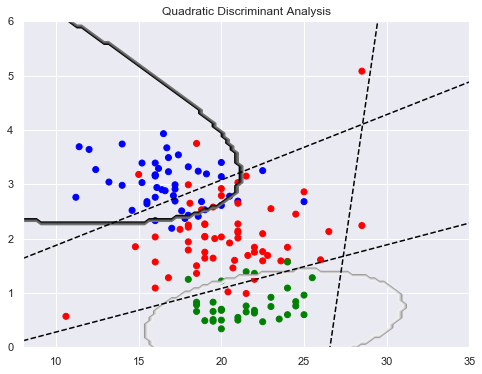

In [242]:
## Fitting on QDA

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf_QDA = QuadraticDiscriminantAnalysis().fit(X_train_input,Y_train_input)
print('QDA train Score: ', clf_QDA.score(X_train_input,Y_train_input))

fig, ax1 = plt.subplots(figsize=(8,6))
ax1.set(xlim=(8, 35), ylim=(0, 6), title='Quadratic Discriminant Analysis')
colors=np.array(['blue','red', 'green'])
ax1.scatter(X_train_input[:,0], X_train_input[:,1], color=colors[Y_train_input-1])

## Plot LDA Decision Boundary
ax1.plot(ht, db1.T, label='LDA DB', color='black', linestyle='--')
ax1.plot(ht, db2.T, label='LDA DB', color='black', linestyle='--')
ax1.plot(ht, db3.T, label='LDA DB', color='black', linestyle='--')
print('LDA train Score: ', clf_LDA.score(X_train_input,Y_train_input))

## Plot QDA Decision Boundary
r1 = np.linspace(ax1.get_xlim()[0], ax1.get_xlim()[1], 100)
r2 = np.linspace(ax1.get_ylim()[0], ax1.get_ylim()[1], 100)
R1, R2 = np.meshgrid(r1, r2)
R = np.c_[R1.ravel(), R2.ravel()]
Z = clf_QDA.predict(R).reshape(R1.shape)
ax1.contour(R1, R2, Z, cmap="Greys_r")

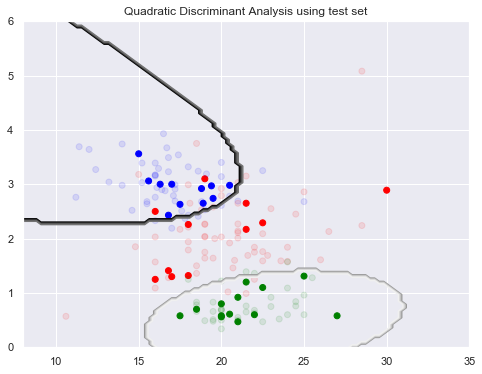

In [243]:
## Test set으로 scatter plot 그려보기

fig, ax = plt.subplots(figsize=(8,6))
ax.set(xlim=(8, 35), ylim=(0, 6), title='Quadratic Discriminant Analysis using test set')
colors=np.array(['blue','red', 'green'])
ax.scatter(X_test_input[:,0], X_test_input[:,1], color=colors[Y_test_input-1])
ax.scatter(X_train_input[:,0], X_train_input[:,1], color=colors[Y_train_input-1], alpha = 0.1)
ax.contour(R1, R2, Z, cmap="Greys_r")

In [244]:
## QDA의 MSE 계산하기
MSE_QDA = sum(clf_QDA.predict(X_test_input)!=Y_test_input)/len(Y_test_input)
print(MSE_QDA)


0.05714285714285714


0.8251748251748252


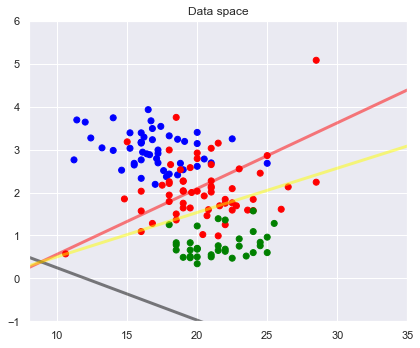

In [245]:
## Logistic Regression without Feature Extraction

from sklearn.linear_model import LogisticRegression
clf_log1 = LogisticRegression(solver='lbfgs',
                         max_iter=1000).fit(X_train_input, Y_train_input)
clf_log1.predict(X_train_input[:100,:]) # return class
clf_log1.predict_proba(X_train_input[:100,:]) # return probability
print(clf_log1.score(X_train_input, Y_train_input)) # return 1- Error rate in Training set

## Plot Decision Surface
fig = plt.figure(figsize=(6,5))
ax1 = fig.add_subplot(111)
ax1.scatter(X_train_input[:,0], X_train_input[:, 1], color=colors[Y_train_input-1])
ax1.set(xlim=(8, 35), ylim=(-1, 6), title='Data space')
w = clf_log1.coef_; b = clf_log1.intercept_
db11 = -b[0]/w[0,1] - w[0,0]/w[0,1] * np.linspace(8, 35, 300)
db22 = -b[1]/w[1,1] - w[1,0]/w[1,1] * np.linspace(8, 35, 300)
db33 = -b[2]/w[2,1] - w[2,0]/w[2,1] * np.linspace(8, 35, 300)
ax1.plot(np.linspace(8, 35, 300), db11.T, label='Decision Boundary', 
         linewidth=3, color='red', alpha=0.5)
ax1.plot(np.linspace(8, 35, 300), db22.T, label='Decision Boundary', 
         linewidth=3, color='black', alpha=0.5)
ax1.plot(np.linspace(8, 35, 300), db33.T, label='Decision Boundary', 
         linewidth=3, color='yellow', alpha=0.5)
fig.tight_layout()

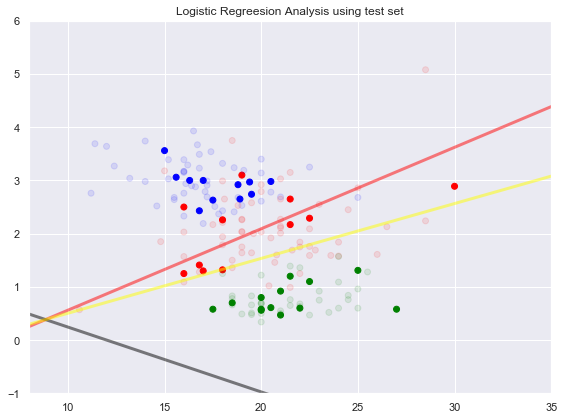

In [246]:
## Test set으로 Scatter plot 그려보기

fig, ax1 = plt.subplots(figsize=(8,6))
ax1.set(xlim=(8, 35), ylim=(-1, 6), title='Logistic Regreesion Analysis using test set')
colors=np.array(['blue','red', 'green'])
ax1.scatter(X_test_input[:,0], X_test_input[:,1], color=colors[Y_test_input-1])
ax1.scatter(X_train_input[:,0], X_train_input[:,1], color=colors[Y_train_input-1], alpha = 0.1)
ax1.plot(np.linspace(8, 35, 300), db11.T, label='Decision Boundary', 
         linewidth=3, color='red', alpha=0.5)
ax1.plot(np.linspace(8, 35, 300), db22.T, label='Decision Boundary', 
         linewidth=3, color='black', alpha=0.5)
ax1.plot(np.linspace(8, 35, 300), db33.T, label='Decision Boundary', 
         linewidth=3, color='yellow', alpha=0.5)
fig.tight_layout()

In [247]:
## Logistic Regreesion without Feature Extraction의 Test MSE 구하기

MSE_log1 = sum(clf_log1.predict(X_test_input) != Y_test_input) / len(Y_test_input)
MSE_log1

0.14285714285714285

In [248]:
## Logistic Regression with Feature Extraction: Poly
## kcv로 차수결정

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
kcv = KFold(n_splits=5, shuffle=True)

kcvMSE_train = np.zeros(0)     # MSE 저장용 array 생성
kcvMSE_test = np.zeros(0)


for i in np.arange(10):
    for train_index, test_index in kcv.split(X_train_input, Y_train_input):
        print("TRAIN:", train_index, "TEST:", test_index)
        CV_X_train, CV_X_test = X_train_input[train_index,:], X_train_input[test_index,:]
        CV_Y_train, CV_Y_test = Y_train_input[train_index], Y_train_input[test_index]
    
        poly = PolynomialFeatures(degree=i+1, include_bias=False)
        X_poly = poly.fit_transform(CV_X_train)   # order : [X1 X2 X1^2 X1*X2 X2^2]
        clf_log2 = LogisticRegression(max_iter=10000).fit(CV_X_train, CV_Y_train)
        kcvMSE_train = np.append(kcvMSE_train, sum(clf_log2.predict(CV_X_train)!=CV_Y_train)/len(CV_Y_train))
        kcvMSE_test = np.append(kcvMSE_test, sum(clf_log2.predict(CV_X_test)!=CV_Y_test)/len(CV_Y_test))

TRAIN: [  1   2   3   4   5   6   7   8   9  11  13  14  15  17  18  19  20  21
  22  23  24  25  26  27  28  29  31  32  33  34  35  37  38  39  40  41
  42  43  45  46  48  49  50  51  52  53  55  56  57  58  59  61  62  63
  65  66  68  69  70  71  72  73  75  76  77  78  79  80  81  82  83  84
  87  88  91  93  94  95  97  98  99 100 101 102 103 105 106 107 108 111
 112 113 114 115 116 118 119 121 122 123 124 125 126 127 129 131 132 133
 134 135 136 137 138 142] TEST: [  0  10  12  16  30  36  44  47  54  60  64  67  74  85  86  89  90  92
  96 104 109 110 117 120 128 130 139 140 141]
TRAIN: [  0   2   4   5   6   9  10  11  12  13  14  15  16  17  18  19  22  23
  24  25  26  29  30  33  35  36  38  40  42  44  45  46  47  48  49  52
  53  54  55  56  58  59  60  61  62  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  83  84  85  86  87  88  89  90  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 107 109 110 111 112
 113 114 115 116 117 119 120 122

TRAIN: [  0   2   4   5   6   7   8   9  10  11  12  13  14  15  16  17  19  21
  22  23  26  27  28  29  30  32  33  34  36  37  38  39  40  41  42  43
  45  46  47  49  50  51  52  54  55  56  57  60  61  62  63  64  66  68
  69  70  71  72  73  74  75  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  95  97  99 101 102 103 104 105 106 108 109 111
 113 114 115 117 118 119 120 122 123 124 125 126 127 129 131 132 133 134
 135 136 137 138 140 141 142] TEST: [  1   3  18  20  24  25  31  35  44  48  53  58  59  65  67  76  94  96
  98 100 107 110 112 116 121 128 130 139]
TRAIN: [  1   2   3   5   7   8   9  11  12  13  14  15  17  18  20  21  22  23
  24  25  26  28  29  30  31  32  35  38  39  41  42  44  45  46  47  48
  49  50  51  52  53  54  55  56  57  58  59  60  62  64  65  66  67  69
  71  73  75  76  77  78  79  80  81  82  83  84  85  87  88  89  90  91
  93  94  95  96  97  98 100 102 103 104 105 106 107 108 109 110 112 113
 114 115 116 118 119 120 121 122

TRAIN: [  0   2   3   4   5   6   7   8   9  10  12  15  16  17  18  19  20  21
  24  25  27  29  30  31  32  34  35  36  37  38  39  40  41  42  43  44
  45  46  47  48  49  50  52  53  54  55  56  57  58  59  61  62  63  66
  68  69  70  72  73  74  75  78  79  80  81  83  84  85  87  88  89  90
  91  93  94  97  99 100 102 103 104 105 106 107 108 109 110 111 112 114
 117 118 119 120 121 122 123 124 125 126 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142] TEST: [  1  11  13  14  22  23  26  28  33  51  60  64  65  67  71  76  77  82
  86  92  95  96  98 101 113 115 116 127]
TRAIN: [  0   1   2   3   7   8   9  10  11  12  13  14  15  16  17  18  20  21
  22  25  26  27  28  30  31  32  33  34  35  36  37  38  40  42  43  44
  45  46  47  48  49  50  51  52  53  55  57  59  60  61  62  63  65  66
  67  68  69  70  71  73  74  75  76  77  78  79  80  82  84  85  86  87
  88  90  92  93  94  95  96  97  98  99 101 103 106 107 109 110 111 112
 113 114 116 117 118 119 120 122

TRAIN: [  0   1   4   6   7   8   9  10  11  12  13  14  15  18  19  20  21  22
  24  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42
  43  44  46  47  48  49  50  52  53  54  55  56  57  58  59  60  61  62
  63  69  70  71  72  73  75  76  77  78  79  80  81  82  83  84  85  89
  90  91  92  93  94  95  96  97  99 100 101 102 103 104 105 106 107 108
 109 110 111 113 114 117 118 119 120 121 122 124 126 127 128 129 130 131
 132 133 134 135 136 138 139] TEST: [  2   3   5  16  17  23  25  45  51  64  65  66  67  68  74  86  87  88
  98 112 115 116 123 125 137 140 141 142]


In [249]:
kcvMSE_train = kcvMSE_train.reshape(10, 5)
kcvMSE_test = kcvMSE_test.reshape(10, 5)

In [250]:
## 평균으로 MSE값 계산하기
kcvMSE_train_mean = np.zeros((10, 1))
kcvMSE_test_mean = np.zeros((10, 1))

for i in np.arange(10):
    kcvMSE_train_mean[i] = np.mean(kcvMSE_train[i, :])
    kcvMSE_test_mean[i] = np.mean(kcvMSE_test[i, :])

print(kcvMSE_train_mean)
print(kcvMSE_test_mean)

[[0.164]
 [0.164]
 [0.17 ]
 [0.173]
 [0.175]
 [0.161]
 [0.177]
 [0.163]
 [0.175]
 [0.177]]
[[0.183]
 [0.181]
 [0.175]
 [0.181]
 [0.202]
 [0.21 ]
 [0.195]
 [0.195]
 [0.189]
 [0.189]]


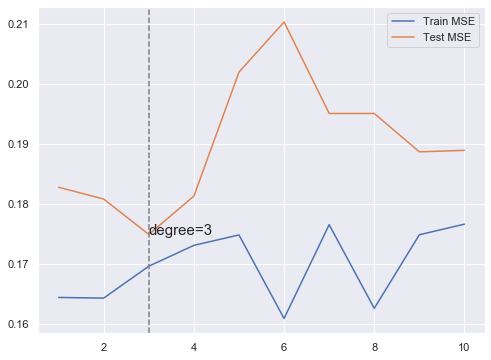

In [251]:
## Test, Train MSE 그려보기

fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot(np.arange(1, 11), kcvMSE_train_mean, label='Train MSE')
ax1.plot(np.arange(1, 11), kcvMSE_test_mean, label='Test MSE')
ax1.axvline(x=np.arange(1, 11)[np.argmin(kcvMSE_test_mean)], linestyle='--', color='grey')
ax1.text(np.arange(1, 11)[np.argmin(kcvMSE_test_mean)], np.amin(kcvMSE_test_mean), 'degree={0}'.format(np.argmin(kcvMSE_test_mean)+1), size=15)
ax1.legend()

In [252]:
## Logistic Regression with Feature Extraction: Polynomial with degree 2

poly = PolynomialFeatures(degree=3, include_bias=False) # No column of 1s
X_poly_train = poly.fit_transform(X_train_input)   # order : [X1 X2 X1^2 X1*X2 X2^2]
X_poly_test = poly.fit_transform(X_test_input)
clf_log2 = LogisticRegression(max_iter=10000).fit(X_poly_train, Y_train_input)
print(clf_log2.score(X_poly_train, Y_train_input)) # return 1- Error rate in Training set

0.8391608391608392


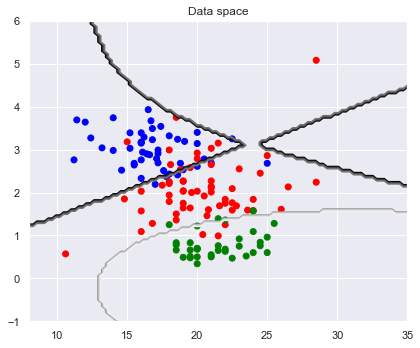

In [253]:
## Plot Results
fig = plt.figure(figsize=(6,5))
ax1 = fig.add_subplot(111)
ax1.scatter(X_train_input[:,0], X_train_input[:, 1], 
            color=colors[Y_train_input-1])
ax1.set(xlim=(8, 35), ylim=(-1, 6), title='Data space')

## Plot Decision Surface
r1 = np.linspace(ax1.get_xlim()[0], ax1.get_xlim()[1], 100)
r2 = np.linspace(ax1.get_ylim()[0], ax1.get_ylim()[1], 100)
R1, R2 = np.meshgrid(r1, r2)
R = np.c_[R1.ravel(), R2.ravel()]
R_poly = poly.fit_transform(R)
Z = clf_log2.predict(R_poly).reshape(R1.shape)
plt.contour(R1, R2, Z, cmap="Greys_r")

fig.tight_layout()

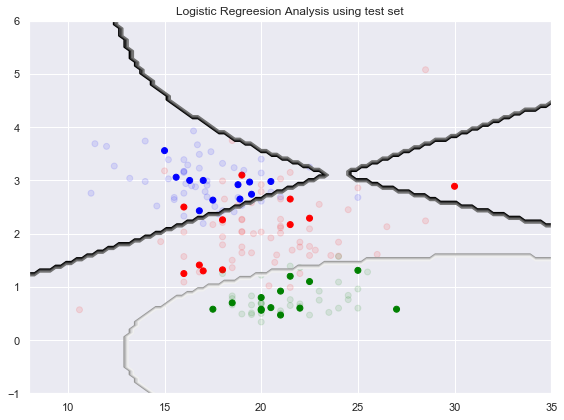

In [254]:
## Test set으로 Scatter plot 그려보기

fig, ax1 = plt.subplots(figsize=(8,6))
ax1.set(xlim=(8, 35), ylim=(-1, 6), title='Logistic Regreesion Analysis using test set')
colors=np.array(['blue','red', 'green'])
ax1.scatter(X_test_input[:,0], X_test_input[:,1], color=colors[Y_test_input-1])
ax1.scatter(X_train_input[:,0], X_train_input[:,1], color=colors[Y_train_input-1], alpha = 0.1)

r11 = np.linspace(ax1.get_xlim()[0], ax1.get_xlim()[1], 100)
r22 = np.linspace(ax1.get_ylim()[0], ax1.get_ylim()[1], 100)
R11, R22 = np.meshgrid(r11, r22)
R = np.c_[R11.ravel(), R22.ravel()]
R_poly = poly.fit_transform(R)
Z2 = clf_log2.predict(R_poly).reshape(R1.shape)
plt.contour(R11, R22, Z2, cmap="Greys_r")

fig.tight_layout()

In [255]:
## Test MSE 계산하기

MSE_log2 = sum(clf_log2.predict(X_poly_test)!=Y_test_input)/len(Y_test_input)
MSE_log2

0.08571428571428572

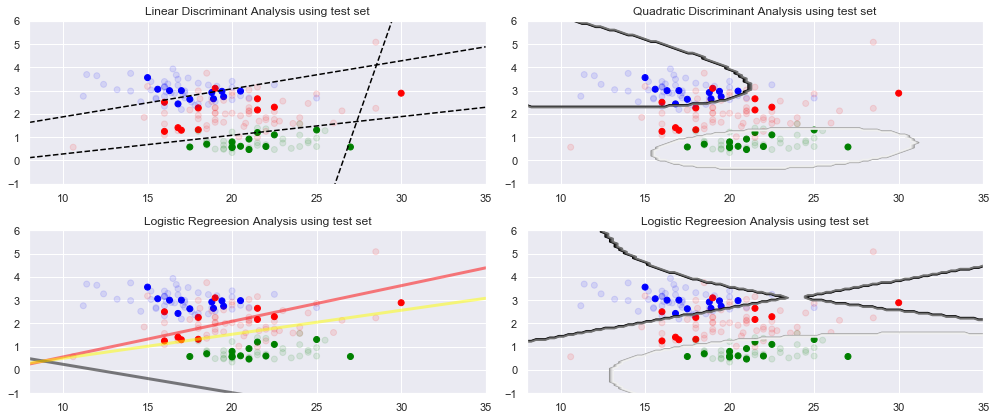

In [260]:
## 한번에 그려보기
fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(221)
ax1.set(xlim=(8, 35), ylim=(-1, 6), title='Linear Discriminant Analysis using test set')
colors=np.array(['blue','red', 'green'])
ax1.scatter(X_test_input[:,0], X_test_input[:,1], color=colors[Y_test_input-1])
ax1.scatter(X_train_input[:,0], X_train_input[:,1], color=colors[Y_train_input-1], alpha = 0.1)
ax1.plot(ht, db1.T, label='LDA DB', color='black', linestyle='--')
ax1.plot(ht, db2.T, label='LDA DB', color='black', linestyle='--')
ax1.plot(ht, db3.T, label='LDA DB', color='black', linestyle='--')

ax2 = fig.add_subplot(222)
ax2.set(xlim=(8, 35), ylim=(-1, 6), title='Quadratic Discriminant Analysis using test set')
colors=np.array(['blue','red', 'green'])
ax2.scatter(X_test_input[:,0], X_test_input[:,1], color=colors[Y_test_input-1])
ax2.scatter(X_train_input[:,0], X_train_input[:,1], color=colors[Y_train_input-1], alpha = 0.1)
r1 = np.linspace(ax1.get_xlim()[0], ax1.get_xlim()[1], 100)
r2 = np.linspace(ax1.get_ylim()[0], ax1.get_ylim()[1], 100)
R1, R2 = np.meshgrid(r1, r2)
R = np.c_[R1.ravel(), R2.ravel()]
Z = clf_QDA.predict(R).reshape(R1.shape)
ax2.contour(R1, R2, Z, cmap="Greys_r")

ax3 = fig.add_subplot(223)
ax3.set(xlim=(8, 35), ylim=(-1, 6), title='Logistic Regreesion Analysis using test set')
colors=np.array(['blue','red', 'green'])
ax3.scatter(X_test_input[:,0], X_test_input[:,1], color=colors[Y_test_input-1])
ax3.scatter(X_train_input[:,0], X_train_input[:,1], color=colors[Y_train_input-1], alpha = 0.1)
ax3.plot(np.linspace(8, 35, 300), db11.T, label='Decision Boundary', 
         linewidth=3, color='red', alpha=0.5)
ax3.plot(np.linspace(8, 35, 300), db22.T, label='Decision Boundary', 
         linewidth=3, color='black', alpha=0.5)
ax3.plot(np.linspace(8, 35, 300), db33.T, label='Decision Boundary', 
         linewidth=3, color='yellow', alpha=0.5)
fig.tight_layout()

ax4 = fig.add_subplot(224)
ax4.set(xlim=(8, 35), ylim=(-1, 6), title='Logistic Regreesion Analysis using test set')
colors=np.array(['blue','red', 'green'])
ax4.scatter(X_test_input[:,0], X_test_input[:,1], color=colors[Y_test_input-1])
ax4.scatter(X_train_input[:,0], X_train_input[:,1], color=colors[Y_train_input-1], alpha = 0.1)

r11 = np.linspace(ax1.get_xlim()[0], ax1.get_xlim()[1], 100)
r22 = np.linspace(ax1.get_ylim()[0], ax1.get_ylim()[1], 100)
R11, R22 = np.meshgrid(r11, r22)
R2 = np.c_[R11.ravel(), R22.ravel()]
R2_poly = poly.fit_transform(R)
Z2 = clf_log2.predict(R2_poly).reshape(R11.shape)
plt.contour(R11, R22, Z2, cmap="Greys_r")

fig.tight_layout()


In [261]:
## Total MSE 비교
print("MSE of LDA :", MSE_LDA)
print("MSE of QDA :", MSE_QDA)
print("MSE of Logistic without Feature Extraction :", MSE_log1)
print("MSE of Logistic with Feature Extraction :", MSE_log2)
np.min([MSE_LDA, MSE_QDA, MSE_log1, MSE_log2])   ## LDA, QDA가 제일 좋다

MSE of LDA : 0.05714285714285714
MSE of QDA : 0.05714285714285714
MSE of Logistic without Feature Extraction : 0.14285714285714285
MSE of Logistic with Feature Extraction : 0.08571428571428572


0.05714285714285714